<a href="https://colab.research.google.com/github/preritt/CS231n-/blob/master/ComputeDIScoreCNNVer04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.models import Model
from keras.optimizers import RMSprop
from keras.layers import Input,Dense,Flatten,Dropout,merge,Reshape,Conv2D,MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.models import Model,Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adadelta, RMSprop,SGD,Adam
from keras import regularizers
from keras import backend as K
from keras.utils import to_categorical
import tensorflow as tf

In [12]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", reshape=False)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz

Image Shape: (28, 28, 1)

Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


In [0]:
from keras.utils.vis_utils import plot_model


In [0]:
# Define function to load the data and conver to array format (#images,dim1,dim2)

In [0]:
# Extract images

In [16]:
import numpy as np

# Pad images with 0s
X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
print("Updated Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (32, 32, 1)


In [0]:
# Create dictionary of target classes
label_dict = {
 0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
}

In [0]:
# Explore some images

Text(0.5, 1.0, '(Label: A)')

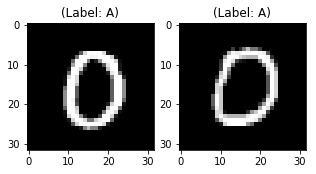

In [19]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(X_train[10], (32,32))
curr_lbl = y_train[10]
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(X_test[10], (32,32))
curr_lbl = y_test[10]
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(label_dict[curr_lbl]) + ")")

In [0]:
# make sure data is in float32 format
X_train = X_train/np.max(X_train)
X_validation = X_validation/np.max(X_validation)
X_test = X_test/np.max(X_test)


In [0]:
# model parameters
batch_size = 16
epochs = 1
inChannel = 1
x, y = X_train.shape[1],X_train.shape[2]
input_img = Input(shape = (x, y, inChannel))
num_classes = 10

In [0]:
def getScoresAndLayersDense(input_img,instance_number = 'First'):
  appended_name = instance_number
  conv1_1 = Conv2D(6, (3, 3), activation='relu', padding='same',name = appended_name + '_conv1_1')(input_img) #28 x 28 x 32
  conv1_1 = BatchNormalization(name = appended_name + '_bn1_1')(conv1_1)

  pool1_1 = MaxPooling2D(pool_size=(2, 2), name = appended_name + '_maxPool1_1')(conv1_1) #14 x 14 x 32
  conv1_2 = Conv2D(16, (3, 3), activation='relu', padding='same',name = appended_name + '_conv1_2')(pool1_1) #28 x 28 x 32
  conv1_2 = BatchNormalization(name = appended_name + '_bn2_1')(conv1_2)

  pool1_2 = MaxPooling2D(pool_size=(2, 2), name = appended_name + '_maxPool1_2')(conv1_2) #14 x 14 x 32 
  
  flat = Flatten()(pool1_2) # 784*1
  hidden1 = Dense(300, activation='relu',name = appended_name + '_Hidden1')(flat)
  hidden2 = Dense(100, activation='relu',name = appended_name + '_Hidden2')(hidden1)
  scores = Dense(num_classes, activation='softmax',name = appended_name + '_scores')(hidden2)
  return conv1_1,hidden1,hidden2,scores

In [0]:
conv1_1, hidden1,hidden2,scores = getScoresAndLayersDense(input_img,'First')
classifier = Model(inputs=[input_img], outputs=[scores])


In [38]:
classifier.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
First_conv1_1 (Conv2D)       (None, 32, 32, 6)         60        
_________________________________________________________________
First_bn1_1 (BatchNormalizat (None, 32, 32, 6)         24        
_________________________________________________________________
First_maxPool1_1 (MaxPooling (None, 16, 16, 6)         0         
_________________________________________________________________
First_conv1_2 (Conv2D)       (None, 16, 16, 16)        880       
_________________________________________________________________
First_bn2_1 (BatchNormalizat (None, 16, 16, 16)        64        
_________________________________________________________________
First_maxPool1_2 (MaxPooling (None, 8, 8, 16)          0         
__________

In [0]:
plot_model(classifier, to_file="LeNEt300-100.png", show_shapes=True, show_layer_names=True)

In [0]:
train_Y_one_hot = to_categorical(y_train)
validation_Y_one_hot = to_categorical(y_validation)
test_Y_one_hot = to_categorical(y_test)

In [41]:
# train the model
# classifier_train = classifier.fit(train_X, train_ground, batch_size=batch_size,epochs=1,verbose=1,validation_data=(valid_X, valid_ground))
classify_train = classifier.fit(X_train, train_Y_one_hot, batch_size=64,epochs=5,verbose=1,validation_data=(X_validation, validation_Y_one_hot))


Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 12s 218us/step - loss: 0.1405 - acc: 0.9567 - val_loss: 0.0867 - val_acc: 0.9746
Epoch 2/5
55000/55000 [==============================] - 11s 201us/step - loss: 0.0530 - acc: 0.9833 - val_loss: 0.1046 - val_acc: 0.9694
Epoch 3/5
55000/55000 [==============================] - 11s 200us/step - loss: 0.0358 - acc: 0.9881 - val_loss: 0.0679 - val_acc: 0.9786
Epoch 4/5
55000/55000 [==============================] - 11s 208us/step - loss: 0.0264 - acc: 0.9913 - val_loss: 0.0588 - val_acc: 0.9850
Epoch 5/5
55000/55000 [==============================] - 11s 201us/step - loss: 0.0200 - acc: 0.9933 - val_loss: 0.0497 - val_acc: 0.9876


In [0]:
get_hidden1_output_function = K.function([classifier.layers[0].input],
                                  [classifier.get_layer('First_Hidden1').output])   #get_layer
hidden1_output = get_hidden1_output_function([X_test])[0]

In [0]:
get_cnn1_output_function = K.function([classifier.layers[0].input],
                                  [classifier.get_layer('First_bn1_1').output])   #get_layer
cnn1_output = get_cnn1_output_function([X_test])[0]

In [50]:
hidden1_output.shape

(10000, 300)

In [52]:
cnn1_output.shape

(10000, 32, 32, 6)

In [0]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [0]:
pca1 = PCA(n_components=2)
F1_PCA = pca1.fit_transform(hidden1_output) #test_data, test_Y_one_hot


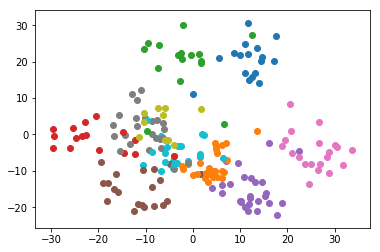

In [55]:
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
for i in range(200):
    plt.scatter(F1_PCA[i,0],F1_PCA[i,1],c=colors[y_test[i]])

In [0]:
# test_labels[0:111]

In [57]:
hidden1_output.shape

(10000, 300)

## Code to compute DI score of a layer

In [0]:
def getDIScoreOfLayer(layer_output, true_labels):
  # computeScatterMatrix
  rho = 1e-6
  mu = layer_output.mean(axis=0)
#   print(mu.shape)
  mu = mu.reshape((1,-1))
  centered_data = layer_output - mu
  S_bar = np.matmul(centered_data.T,centered_data)
  # compute between class matrix
  total_classes = true_labels.max()
  S_B = np.zeros(shape = (mu.shape[0],mu.shape[0]))
  S_W = np.zeros(shape = (mu.shape[0],mu.shape[0]))

  for l in range(0,total_classes):
    class_l_index = np.where(true_labels == l)
    class_l_output = layer_output[class_l_index[0],:]
    mu_l = class_l_output.mean(axis=0)
    mu_l = mu_l.reshape((1,-1))
    total_examples_this_class = class_l_index[0].shape   
    ss = mu_l - mu
    S_B = S_B + total_examples_this_class*np.matmul((mu_l - mu).T,(mu_l - mu))
    
  # compute within class scatter matrix
#   for l in range(0,total_classes):
#     class_l_index = np.where(true_labels == l)
#     class_l_output = layer_output[class_l_index[0],:]
#     mu_l = class_l_output.mean(axis=0)
#     mu_l = mu_l.reshape((1,-1))
#     total_examples_this_class = class_l_index[0].shape
#     class_l_index_list = np.ndarray.tolist(class_l_index[0])
#     for ex in class_l_index_list:
#       S_W = S_W + np.matmul((layer_output[ex,:] - mu_l),(layer_output[ex,:] - mu_l))
#   print(S_bar.shape)
#   print(S_B.shape)
  DI_Score = np.trace(np.matmul(np.linalg.inv(S_bar + rho*np.eye(S_bar.shape[0])),S_B))
  return DI_Score
    
    
    

In [77]:
cnn1_output.shape

(10000, 32, 32, 6)

In [0]:
def getDIScoreOfLayerCNNLayer(cnn_outputs, true_labels):
  # computeScatterMatrix
  number_of_filters = cnn_outputs.shape[3]
  cnn_di_scores = []
  for filt in range(0,number_of_filters):
    outputs_filter = cnn_outputs[:,:,:,filt]
    outputs_filter_reshaped = np.reshape(outputs_filter, newshape=(cnn_outputs.shape[0],-1))
    this_filter_score = getDIScoreOfLayer(outputs_filter_reshaped, true_labels)
    cnn_di_scores.append(this_filter_score)
  return cnn_di_scores
    
    
    

In [0]:
d = getDIScoreOfLayer(hidden1_output, y_test)

In [80]:
d


7.28717227554946

In [81]:
getDIScoreOfLayerCNNLayer(cnn1_output, y_test)

[6.469722149569672,
 5.908691721587186,
 6.053436663745952,
 6.034774848951665,
 5.845621298618829,
 6.0649492754093375]

In [0]:
test_eval = classifier.evaluate(X_test, test_Y_one_hot, verbose=0)


In [70]:
test_eval

[0.05037166946069556, 0.9859]